# Baseline1 - Preprocessing (Prosodic Features) - PT-BR-SER (Coraa V6)

This is an example of pre-processing audio segments to extract prosodic features.

We use raw audio, i.e., no pre-processing or cleaning has been done beforehand. Participants exploring prosodic features can pre-process the audio to improve the quality of extracted features.

# Download Dataset

* https://drive.google.com/drive/folders/12Nuv8J7pBHJuNU3nH2c7F8VwCDEE6GDt

In [ ]:
!gdown --id 1N56YOgJ_plF4K8Eyh9hqiP0_O5L8uwya

Downloading...
From: https://drive.google.com/uc?id=1N56YOgJ_plF4K8Eyh9hqiP0_O5L8uwya
To: /content/data_train.zip
100% 61.4M/61.4M [00:00<00:00, 66.9MB/s]


In [ ]:
!unzip data_train.zip

Archive:  data_train.zip
   creating: train/
  inflating: train/bfamcv01_segment163_neutral.wav  
  inflating: train/bfamcv01_segment168_non-neutral-male.wav  
  inflating: train/bfamcv01_segment170_non-neutral-male.wav  
  inflating: train/bfamcv01_segment173_neutral.wav  
  inflating: train/bfamcv01_segment177_neutral.wav  
  inflating: train/bfamcv01_segment181_neutral.wav  
  inflating: train/bfamcv01_segment191_non-neutral-male.wav  
  inflating: train/bfamcv01_segment194_neutral.wav  
  inflating: train/bfamcv01_segment195_neutral.wav  
  inflating: train/bfamcv01_segment200_non-neutral-male.wav  
  inflating: train/bfamcv02_segment100_neutral.wav  
  inflating: train/bfamcv02_segment110_non-neutral-female.wav  
  inflating: train/bfamcv02_segment116_non-neutral-female.wav  
  inflating: train/bfamcv02_segment157_neutral.wav  
  inflating: train/bfamcv02_segment179_neutral.wav  
  inflating: train/bfamcv02_segment185_neutral.wav  
  inflating: train/bfamcv02_segment200_non-neutra

In [ ]:
from os import listdir
from os.path import isfile, join
import pandas as pd

train_data_dir = 'train'

train_audio_files = [f for f in listdir(train_data_dir) if isfile(join(train_data_dir, f))]

L = []
for f in train_audio_files:
  v = f.replace('.wav','').split('_')
  L.append([f,v[len(v)-1]])

df_data = pd.DataFrame(L)
df_data.columns = ['file','label']

In [ ]:
df_data

,file,label
0,bfammn35_segment142_non-neutral-female.wav,non-neutral-female
1,bpubcv09_segment437_neutral.wav,neutral
2,bfammn10_segment281_neutral.wav,neutral
3,bfamcv29_segment198_neutral.wav,neutral
4,bpubdl08_segment281_neutral.wav,neutral
...,...,...
620,bpubdl04_segment123_neutral.wav,neutral
621,bfammn10_segment219_neutral.wav,neutral
622,bfammn10_segment196_non-neutral-male.wav,non-neutral-male
623,bpubdl08_segment272_neutral.wav,neutral


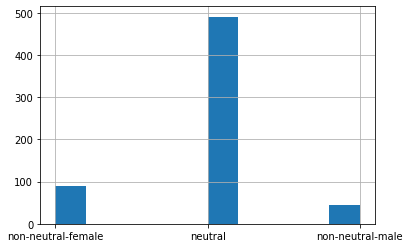

In [ ]:
df_data.label.hist()

# Prosodic Features

Related methods.

> Luengo, I., Navas, E., Hernáez, I., & Sánchez, J. (2005). Automatic emotion recognition using prosodic parameters. In Ninth European conference on speech communication and technology.

> Rao, K. S., Koolagudi, S. G., & Vempada, R. R. (2013). Emotion recognition from speech using global and local prosodic features. International journal of speech technology, 16(2), 143-160.

In [ ]:
!git clone https://github.com/uzaymacar/speech-features.git
!mv speech-features/* .
import pandas as pd
!pip install praat-parselmouth
import parselmouth
from feature_extraction_utils import *

Cloning into 'speech-features'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 44 (delta 15), reused 32 (delta 7), pack-reused 0
Unpacking objects: 100% (44/44), done.
     |████████████████████████████████| 10.7 MB 9.7 MB/s 


In [ ]:
def extract_prosody(sound_filepath):

  sound = parselmouth.Sound(sound_filepath)
  df = pd.DataFrame()

  attributes = {}

  intensity_attributes = get_intensity_attributes(sound)[0]
  pitch_attributes = get_pitch_attributes(sound)[0]
  attributes.update(intensity_attributes)
  attributes.update(pitch_attributes)

  hnr_attributes = get_harmonics_to_noise_ratio_attributes(sound)[0]
  gne_attributes = get_glottal_to_noise_ratio_attributes(sound)[0]
  attributes.update(hnr_attributes)
  attributes.update(gne_attributes)

  df['local_jitter'] = None
  df['local_shimmer'] = None
  df.at[0, 'local_jitter'] = get_local_jitter(sound)
  df.at[0, 'local_shimmer'] = get_local_shimmer(sound)

  spectrum_attributes = get_spectrum_attributes(sound)[0]
  attributes.update(spectrum_attributes)

  formant_attributes = get_formant_attributes(sound)[0]
  attributes.update(formant_attributes)

  for attribute in attributes:
      df.at[0, attribute] = attributes[attribute]
      
  df.at[0, 'sound_filepath'] = sound_filepath
  rearranged_columns = df.columns.tolist()[-1:] + df.columns.tolist()[:-1]
  df = df[rearranged_columns]
  return df

In [ ]:
extract_prosody('/content/train/bfamcv01_segment163_neutral.wav')

,sound_filepath,local_jitter,local_shimmer,min_intensity,relative_min_intensity_time,max_intensity,relative_max_intensity_time,mean_intensity,stddev_intensity,q1_intensity,median_intensity,q3_intensity,voiced_fraction,min_pitch,relative_min_pitch_time,max_pitch,relative_max_pitch_time,mean_pitch,stddev_pitch,q1_pitch,q3_pitch,mean_absolute_pitch_slope,pitch_slope_without_octave_jumps,min_hnr,relative_min_hnr_time,max_hnr,relative_max_hnr_time,mean_hnr,stddev_hnr,min_gne,max_gne,mean_gne,stddev_gne,sum_gne,band_energy,band_density,band_energy_difference,band_density_difference,center_of_gravity_spectrum,stddev_spectrum,skewness_spectrum,kurtosis_spectrum,central_moment_spectrum,f1_mean,f2_mean,f3_mean,f4_mean,f1_median,f2_median,f3_median,f4_median,formant_dispersion,average_formant,mff,fitch_vtl,delta_f,vtl_delta_f
0,/content/train/bfamcv01_segment163_neutral.wav,0.0282417,0.142011,39.70854,0.265683,77.218046,0.939734,54.882812,11.290841,42.222614,200.664991,65.264412,0.484375,105.127459,0.176222,581.808346,0.168438,220.297134,96.399029,132.85835,280.519102,606.032836,32.385143,-226.608636,0.120964,39.060418,0.78752,10.110193,4.804052,0.0,0.811757,0.275256,0.352772,715.940597,0.006139,0.000008,-0.637121,-9.088101,693.74424,825.412749,5.387592,33.425918,3.029760e+09,544.799344,1677.429594,2792.022229,3886.400507,530.046815,1668.704638,2780.747781,3864.331639,1111.428274,2210.957718,1755.829831,15.955502,1106.910026,15.809776


In [ ]:
from tqdm.notebook import tqdm
R = []
for index,row in tqdm(df_data.iterrows(),total=len(df_data)):
  wav_file = row['file']
  df = extract_prosody('train/'+wav_file)
  R.append(df)

  0%|          | 0/625 [00:00<?, ?it/s]

In [ ]:
df_prosodic = pd.concat(R).reset_index(drop=True)
L = []
for index,row in df_prosodic.iterrows():
  v = row['sound_filepath'].replace('.wav','').split('_')
  label = v[len(v)-1]
  L.append(label)
df_prosodic['label'] = L
df_prosodic

,sound_filepath,local_jitter,local_shimmer,min_intensity,relative_min_intensity_time,max_intensity,relative_max_intensity_time,mean_intensity,stddev_intensity,q1_intensity,median_intensity,q3_intensity,voiced_fraction,min_pitch,relative_min_pitch_time,max_pitch,relative_max_pitch_time,mean_pitch,stddev_pitch,q1_pitch,q3_pitch,mean_absolute_pitch_slope,pitch_slope_without_octave_jumps,min_hnr,relative_min_hnr_time,max_hnr,relative_max_hnr_time,mean_hnr,stddev_hnr,min_gne,max_gne,mean_gne,stddev_gne,sum_gne,band_energy,band_density,band_energy_difference,band_density_difference,center_of_gravity_spectrum,stddev_spectrum,skewness_spectrum,kurtosis_spectrum,central_moment_spectrum,f1_mean,f2_mean,f3_mean,f4_mean,f1_median,f2_median,f3_median,f4_median,formant_dispersion,average_formant,mff,fitch_vtl,delta_f,vtl_delta_f,label
0,train/bfammn35_segment142_non-neutral-female.wav,0.0305826,0.121356,43.792867,0.503433,82.293678,0.013245,56.702229,9.679460,48.199860,236.723219,65.524775,0.363919,99.752881,0.538652,415.294681,0.840136,230.065167,50.847592,202.352565,258.031043,308.492286,17.657962,-227.169842,0.839363,43.691226,0.836287,13.141385,5.987800,0.0,0.792247,0.279094,0.356638,725.924315,0.010657,1.332140e-05,-7.312993,-15.763973,376.882035,448.368187,7.532681,82.182126,6.789752e+08,561.469046,1695.957999,3014.539237,3957.391282,531.762217,1664.900697,3048.001441,3975.075286,1147.771023,2304.934910,1809.741662,15.495903,1156.952346,15.125947,non-neutral-female
1,train/bpubcv09_segment437_neutral.wav,0.00845574,0.318286,37.606909,0.300987,51.533965,0.843395,40.360021,2.053025,39.136851,201.636964,41.010695,0.005263,200.644878,0.837944,202.629051,0.835334,201.636964,1.403023,200.644878,202.629051,198.417356,17.036046,-224.722111,0.336900,24.641300,0.250800,-1.990052,2.940849,0.0,0.434614,0.137067,0.176021,356.511007,0.000009,1.119199e-08,-1.164604,-9.615584,930.814862,1368.855915,2.791975,8.064977,7.161183e+09,770.687719,1367.384735,2960.864953,3769.162594,752.839003,1248.547256,2885.210500,3847.022643,1031.394547,2183.404851,1797.224521,15.933012,1091.754566,16.029244,neutral
2,train/bfammn10_segment281_neutral.wav,0.0176871,0.136007,50.452172,0.480490,82.684088,0.847818,67.844637,8.253514,61.154864,152.424481,75.767882,0.728125,66.894993,0.982102,453.157197,0.705501,164.661559,50.236070,135.700286,181.206122,632.649887,35.502382,-225.854481,0.078183,33.897247,0.631287,8.845639,5.440006,0.0,0.836619,0.286994,0.366818,746.471890,0.029769,3.721130e-05,3.646660,-4.804321,595.115843,443.152494,7.083178,72.619618,6.164356e+08,584.935670,1640.114544,2773.475143,3970.334597,566.392106,1620.901850,2707.050682,3954.100383,1129.236092,2212.111255,1770.534921,15.823775,1110.548899,15.757973,neutral
3,train/bfamcv29_segment198_neutral.wav,0.0146546,0.102559,27.866928,0.404538,79.174581,0.268346,55.420463,13.840524,45.080617,272.135898,66.019416,0.647283,81.541721,0.925653,370.766998,0.363273,272.035755,34.798032,255.265080,288.211479,306.937231,16.909513,-227.933813,0.204513,46.205462,0.537075,13.908295,5.240389,0.0,0.901099,0.328738,0.419550,855.048680,0.011889,1.486120e-05,9.776148,1.325167,999.013727,599.328850,2.921569,15.139326,6.289435e+08,725.142096,1753.934947,2674.935042,3869.874716,716.033442,1716.115424,2702.849305,3948.302547,1077.423035,2270.825179,1902.952791,14.803973,1119.446287,15.632729,neutral
4,train/bpubdl08_segment281_neutral.wav,0.0259337,0.147658,61.352456,0.775739,89.067545,0.282360,79.439669,5.137784,77.044937,141.098940,82.913462,0.940334,81.688551,0.953280,410.171145,0.656212,150.299872,46.658664,129.806116,161.317992,529.448287,38.969081,-225.647679,0.772189,34.154459,0.989866,8.566652,5.401261,0.0,0.804564,0.273281,0.349444,710.803441,0.205584,2.569795e-04,-2.872702,-11.323682,489.382289,400.061390,5.478481,50.582571,3.507843e+08,487.623424,1506.499710,2607.172393,3620.142637,450.752899,1495.804060,2582.122256,3604.967876,1051.404992,2033.411773,1582.788401,17.723731,1025.798845,17.059875,neutral
...,...,...,...,

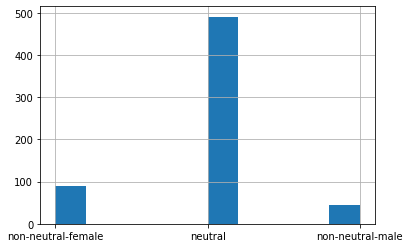

In [ ]:
df_prosodic.label.hist()

In [ ]:
df_prosodic.to_csv('prosodic_features.csv',index=False)